In [1]:
# Carga de librerias
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lectura de los datos
df = pd.read_csv("solicitud_creditos_info.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251617 entries, 0 to 251616
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   index                     251617 non-null  int64  
 1   default                   251617 non-null  int64  
 2   contract_type             251617 non-null  object 
 3   gender                    251617 non-null  object 
 4   flag_vehicle              251617 non-null  object 
 5   flag_properties           251617 non-null  object 
 6   num_children              251617 non-null  int64  
 7   total_income              251617 non-null  float64
 8   loan_amount               251617 non-null  float64
 9   income_type               251617 non-null  object 
 10  marital_status            251617 non-null  object 
 11  age                       251617 non-null  float64
 12  work_age                  251617 non-null  float64
 13  flag_cellphone            251617 non-null  i

,index,default,contract_type,gender,flag_vehicle,flag_properties,num_children,total_income,loan_amount,income_type,...,num_petic_bureau_day,num_petic_bureau_week,num_petic_bureau_month,num_petic_bureau_quarter,num_petic_bureau_year,block_month,year,month,Office,Employee
0,0,1,personal loan,M,N,Y,0,394338.0,1207961.0,shareholder,...,0.0,0.0,2.0,0.0,4.0,10,2017,10,110143,38
1,1,1,personal loan,F,N,Y,0,322796.0,409690.0,salary,...,0.0,0.0,0.0,0.0,1.0,4,2017,4,110143,38
2,2,1,personal loan,M,N,Y,1,241201.0,858450.0,salary,...,0.0,0.0,0.0,0.0,1.0,10,2017,10,110143,38
3,3,1,personal loan,M,N,N,1,264255.0,114679.0,salary,...,0.0,0.0,0.0,0.0,1.0,2,2017,2,110143,35
4,4,1,personal loan,F,N,Y,1,166682.0,402669.0,salary,...,0.0,0.0,0.0,0.0,1.0,12,2017,12,110143,38


In [3]:
df['Office'] = df['Office'].astype(str)

## Cálculo de diferentes KPI

In [4]:
# Columna con el mes en formato fecha
df['fecha'] = df['year'].astype(str) + '/' + df['month'].astype(str) + '/28'
df['fecha'] = pd.to_datetime(df['fecha'])

### KPI de valor de créditos gestionados mensualmente por cada empleado

Esto permite hallar los gestores de crédito (empleados) con mejor y peor rendimiento

In [5]:
# Un KPI relevante podria ser el valor total de los créditos gestionados por los empleados mensualemnte
df_KPI_gestores = pd.pivot_table(df, index = ['Employee'], columns = 'fecha', values='loan_amount', aggfunc='sum')
df_KPI_gestores

fecha,2017-01-28,2017-02-28,2017-03-28,2017-04-28,2017-05-28,2017-06-28,2017-07-28,2017-08-28,2017-09-28,2017-10-28,...,2019-03-28,2019-04-28,2019-05-28,2019-06-28,2019-07-28,2019-08-28,2019-09-28,2019-10-28,2019-11-28,2019-12-28
Employee,,,,,,,,,,,,,,,,,,,,,
10,127472223.0,123547609.0,130449910.0,138033208.0,138726383.0,137055449.0,114786331.0,128700093.0,124804804.0,164131879.0,...,172149499.0,167709153.0,138074278.0,153033168.0,128715905.0,156330548.0,127233547.0,135152122.0,148432267.0,134846954.0
11,57336076.0,45831262.0,38427385.0,58055557.0,61298505.0,46681385.0,46054460.0,49227399.0,46701625.0,53590630.0,...,62966103.0,69374888.0,59672276.0,44233052.0,48019470.0,47062009.0,45429989.0,59789314.0,46719036.0,55598251.0
13,4231591.0,2413467.0,3415021.0,1851734.0,2421760.0,2197719.0,1081050.0,1730012.0,2630220.0,4935871.0,...,2903906.0,4757081.0,2809432.0,3284570.0,4366406.0,2144593.0,6530062.0,7764725.0,4357590.0,3730009.0
14,169015987.0,155014532.0,162397332.0,152322262.0,148616959.0,170664952.0,142156244.0,149539975.0,145021318.0,197862190.0,...,194920429.0,194498456.0,169045658.0,179358275.0,153117086.0,154806340.0,176839715.0,172298090.0,176654881.0,175432483.0
16,22692667.0,21849547.0,31440567.0,21894677.0,34573636.0,31040045.0,24484420.0,22286524.0,26123859.0,23538196.0,...,29405476.0,29414701.0,21359622.0,19555889.0,24132531.0,24600877.0,21834622.0,21322077.0,39631351.0,25273218.0
17,36730220.0,38696855.0,33097710.0,42885393.0,47826780.0,38731074.0,40013761.0,37927661.0,33931443.0,50286757.0,...,48483555.0,50049945.0,41422280.0,39160771.0,32478536.0,47716306.0,34775450.0,39208747.0,49684424.0,38528733.0
18,130174602.0,132451855.0,125629079.0,138602066.0,136860009.0,135671059.0,130866398.0,108934062.0,149094874.0,166303935.0,...,167030002.0,148235651.0,133746791.0,146515396.0,137344857.0,143126649.0,140692094.0,152439424.0,147609884.0,160011939.0
27,37483755.0,36533348.0,28723306.0,39084734.0,22545668.0,28522713.0,28850909.0,32314791.0,33114448.0,36656007.0,...,46113406.0,52748972.0,35692783.0,41830523.0,40447424.0,57058221.0,30111367.0,29105747.0,31732873.0,37851592.0
29,256284523.0,239865661.0,225837610.0,289306435.0,247903738.0,246228619.0,258766634.0,256001319.0,225031045.0,304292768.0,...,313172326.0,352303134.0,245049877.0,257393382.0,222895823.0,258194194.0,267635603.0,265717283.0,234076990.0,256284955.0


Con esto nos puede interesar mostrar los empleados cuyas ventas son las más altas y más bajas de acuerdo al último mes

In [6]:
# Top 3 empleados con menor performance
df_KPI_gestores.sort_values('2019-12-28').head(3) # Ordenar de acuerdo al último mes y tomar los 3 primeros

fecha,2017-01-28,2017-02-28,2017-03-28,2017-04-28,2017-05-28,2017-06-28,2017-07-28,2017-08-28,2017-09-28,2017-10-28,...,2019-03-28,2019-04-28,2019-05-28,2019-06-28,2019-07-28,2019-08-28,2019-09-28,2019-10-28,2019-11-28,2019-12-28
Employee,,,,,,,,,,,,,,,,,,,,,
33,1520045.0,1395632.0,4567319.0,2559194.0,3805933.0,1092984.0,2894527.0,2879270.0,2089124.0,6119752.0,...,622499.0,2468471.0,1571178.0,2497243.0,2487656.0,1138609.0,883559.0,6215621.0,NaN,629425.0
13,4231591.0,2413467.0,3415021.0,1851734.0,2421760.0,2197719.0,1081050.0,1730012.0,2630220.0,4935871.0,...,2903906.0,4757081.0,2809432.0,3284570.0,4366406.0,2144593.0,6530062.0,7764725.0,4357590.0,3730009.0
45,9789190.0,17461830.0,20865765.0,16790222.0,16341334.0,22095208.0,5812614.0,12672161.0,18003035.0,15342561.0,...,17578588.0,13741442.0,20851593.0,16726616.0,14049651.0,7159115.0,14566229.0,8692191.0,19346385.0,15237918.0


In [7]:
# Top 3 empleados con mejor performance
df_KPI_gestores.sort_values('2019-12-28').tail(3) # Ordenar de acuerdo al último mes y tomar los 3 últimos

fecha,2017-01-28,2017-02-28,2017-03-28,2017-04-28,2017-05-28,2017-06-28,2017-07-28,2017-08-28,2017-09-28,2017-10-28,...,2019-03-28,2019-04-28,2019-05-28,2019-06-28,2019-07-28,2019-08-28,2019-09-28,2019-10-28,2019-11-28,2019-12-28
Employee,,,,,,,,,,,,,,,,,,,,,
67,242876982.0,258601964.0,265906363.0,309253378.0,289964787.0,266070215.0,253900822.0,237350489.0,270722321.0,325135231.0,...,339026336.0,396733265.0,318630857.0,294880612.0,299665768.0,298224627.0,297409801.0,268086291.0,299553340.0,306978978.0
72,372302031.0,432952052.0,407454043.0,468654553.0,412170451.0,476456164.0,390042039.0,405860567.0,427984684.0,507466370.0,...,531818374.0,545779212.0,429848204.0,464173998.0,448093840.0,419680131.0,460958968.0,478919533.0,454879932.0,479569872.0
86,504827645.0,510358530.0,505914989.0,575978038.0,561859543.0,580370144.0,502046344.0,472701267.0,500064514.0,619823261.0,...,686793199.0,669514361.0,575984647.0,598591098.0,587502874.0,550007683.0,519808228.0,523655334.0,594812281.0,604095095.0


<AxesSubplot:xlabel='fecha'>

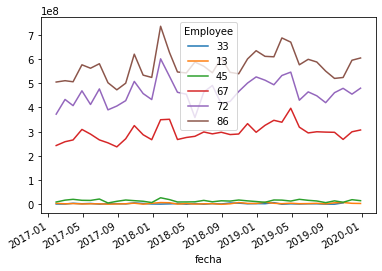

In [8]:
# Grafiquemos 
pd.concat([df_KPI_gestores.sort_values('2019-12-28').head(3),
           df_KPI_gestores.sort_values('2019-12-28').tail(3)]).T.plot()

### KPI de ratio de colocación de tarjetas de crédito por oficina

Se puede estar interesado en que la colocación de tarjetas de crédito se incremente por que son más rentables para la organización. Para ello el seguimiento de este KPI puede ser útil.

In [9]:
df_group_ofi_tipo = df.groupby(['Office', 'year', 'contract_type'])['loan_amount'].sum().reset_index() # Total prestado por officina y tipo de crédito
df_group_ofi_tipo['total'] = df_group_ofi_tipo.groupby(['Office', 'year'])['loan_amount'].transform('sum') # Total para los dos tipos
df_group_ofi_tipo['ratio'] =  round(df_group_ofi_tipo['loan_amount'] * 100 / df_group_ofi_tipo['total'], 2) # Ratios de cada tipo de crédito, en porcentaje a dos dígitos
df_group_ofi_tipo = df_group_ofi_tipo.query("contract_type=='credit card'")  # dejar solo tarjetas de crédito

#  Datos
df_group_ofi_tipo


,Office,year,contract_type,loan_amount,total,ratio
0,110101,2017,credit card,95415089.0,1.982337e+09,4.81
2,110101,2018,credit card,107352653.0,2.166881e+09,4.95
4,110101,2019,credit card,125104228.0,2.194785e+09,5.70
6,110119,2017,credit card,214704329.0,4.216363e+09,5.09
8,110119,2018,credit card,207950729.0,4.423001e+09,4.70
10,110119,2019,credit card,207613774.0,4.436347e+09,4.68
12,110124,2017,credit card,174318004.0,3.620665e+09,4.81
14,110124,2018,credit card,194961444.0,3.981137e+09,4.90
16,110124,2019,credit card,198371062.0,4.173058e+09,4.75
18,110143,2017,credit card,214777551.0,4.351053e+09,4.94


<AxesSubplot:xlabel='Office'>

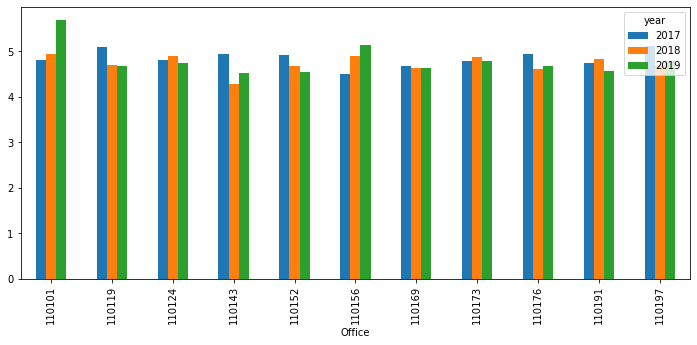

In [10]:
# Gráfico 
df_group_ofi_tipo = pd.pivot_table(df_group_ofi_tipo, index='Office', columns = 'year', values='ratio')
df_group_ofi_tipo.plot(kind='bar', figsize=(12,5))


No hay una tendencia general, algunas oficinas incrementan el ratio y otras lo disminuyen. Resulta interesante preguntarnos por qué ocurre esto y explorarlo a través de los datos en búsqueda de una respuesta. Sin embargo, ¿tenemos la información suficiente para responder a esta pregunta?

Es posible crear muchos más KPIs con la información que tenemos, ya dependerá de las necesidades de la empresa, ydel entendimiento de las necesidades y de los procesos por parte del científico de datos e incluso de su creatividad e ingenio.

## Asociación a través de un modelo lineal

### Ayuda en la toma de decisiones de selección de personal

Ejemplo de un modelo que nos permitirá determinar los factores asociados a la productividad de los empleados

In [13]:
# Creación de la variable de productividad de los empleados (en este caso número de créditos gestionados en 2019)
# Se pueden crear otras variables de productividad (valor de los créditos, evolución de l)

df_target_e = df.query("year==2019").groupby('Employee').count()['index'].to_frame().reset_index() #Cuenta de registros por cada empleado filtrando los datos solo para 2019 tomando cualquier columna
df_target_e.rename({'index':'Productividad'}, inplace=True, axis=1)  # Renombrar la columna index
df_target_e.head()

,Employee,Productividad
0,10,2491
1,11,991
2,13,78
3,14,3110
4,16,468


Para cada empleado se tiene una medida de productividad. Ahora agreguemos las caracteristicas observadas en el momento de la contratación e indaguemos sobre los factores relevantes en la productividad

In [14]:
df_employees = pd.read_csv("Employees.csv")
df_employees.info()
df_employees.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee              32 non-null     int64  
 1   employee_age          32 non-null     int64  
 2   employe_gender        32 non-null     object 
 3   exp_previa            32 non-null     int64  
 4   employee_estudios     32 non-null     object 
 5   resul_prub_seleccion  32 non-null     float64
 6   eval_jefeRH           32 non-null     float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.9+ KB


,Employee,employee_age,employe_gender,exp_previa,employee_estudios,resul_prub_seleccion,eval_jefeRH
0,10,38,F,10,Secud. Completa,8.6,8.4
1,11,35,M,4,Técnico,8.4,8.7
2,13,24,M,1,Uni. Completo,9.2,9.1
3,14,44,F,12,Secud. Completa,8.1,8.9
4,16,32,M,1,Uni. Completo,8.3,8.4


In [15]:
df_target_e = pd.merge(df_target_e, df_employees, on = 'Employee') # Unir los datos de características con la variable objetivo
df_target_e.head()

,Employee,Productividad,employee_age,employe_gender,exp_previa,employee_estudios,resul_prub_seleccion,eval_jefeRH
0,10,2491,38,F,10,Secud. Completa,8.6,8.4
1,11,991,35,M,4,Técnico,8.4,8.7
2,13,78,24,M,1,Uni. Completo,9.2,9.1
3,14,3110,44,F,12,Secud. Completa,8.1,8.9
4,16,468,32,M,1,Uni. Completo,8.3,8.4


In [16]:
# Exporto estos datos (pueden ser utiles despues)
df_target_e.to_csv('Employee_target.csv', index=False)

In [17]:
# Librerias para modelos estadísticos
import statsmodels.api as sm

In [18]:
y = np.log(df_target_e['Productividad']) # Variable objetivo en el objeto y es el logaritmo de la productividad

X = df_target_e[['exp_previa', 'resul_prub_seleccion', 'eval_jefeRH', 'employee_estudios']] # Variables explicativas
X = pd.get_dummies(X, drop_first=True) # Convertir valores categóricas en numericas
X['Constante'] = 1 # Termino constante

In [19]:
mod = sm.OLS(y, X) # Especificar el modelo
res = mod.fit() # Ajustar el modelo
print(res.summary()) # Resulmen del modelo en pantalla

                            OLS Regression Results                            
Dep. Variable:          Productividad   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     18.30
Date:                Sun, 02 Oct 2022   Prob (F-statistic):           4.80e-08
Time:                        19:19:05   Log-Likelihood:                -25.972
No. Observations:                  32   AIC:                             65.94
Df Residuals:                      25   BIC:                             76.20
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
exp_pr

Considerando un nivel de significancia del 5% (0.05) y controlando por otros factores la experiencia previa es un factor asociado con mayor productividad (medida a través del número de ventas) dado el p -valor significativo y el signo positivo del coeficiente. Por otra parte, en comparación con los empleados cuyo nivel educativo máximo al momento de la contración es la secundaria completa, aquellos con estudios universitarios incompletos están asociados con niveles más bajos de productividad (p-valor significativo y signo negativo del coeficiente).

De acuerdo a los datos se sugiere preferir candidatos con mayor experiencia y cuyo nivel de estudios sea diferente a universitarios incompletos.

[El modelo lineal requiere de validaciones adicionales sobre los supuestos que el científico de datos en su proyecto debe tener en cuenta]

***Los estudiantes en su proyectos de la actividad 4 pueden trabajar en desarrollar más este ejemplo o las otras ideas de problemas especificos que les surgan***.